In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder


In [2]:
data=pd.read_csv('enhanced_anxiety_dataset.csv')
data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [3]:
data.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

In [4]:
data['Occupation'].unique()

array(['Artist', 'Nurse', 'Other', 'Scientist', 'Lawyer', 'Teacher',
       'Doctor', 'Musician', 'Student', 'Engineer', 'Freelancer', 'Chef',
       'Athlete'], dtype=object)

In [5]:
age=data['Age'].value_counts().sort_index()

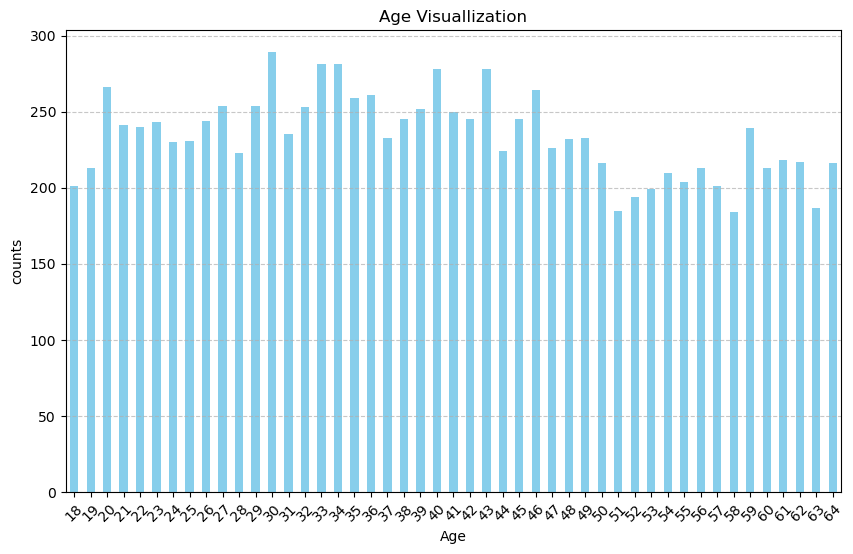

In [6]:
plt.figure(figsize=(10,6))
age.plot(kind='bar',color='skyblue')
plt.title("Age Visuallization")
plt.xlabel('Age')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

C:\Users\Master\AppData\Local\Temp\ipykernel_7212\655140421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Anxiety Level (1-10)"], palette="Set1")


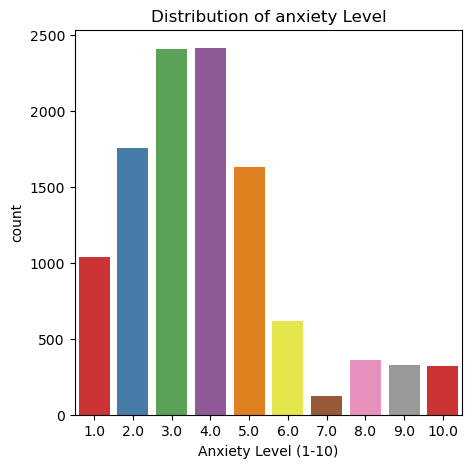

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x=data["Anxiety Level (1-10)"], palette="Set1")
plt.title("Distribution of anxiety Level")
plt.show()

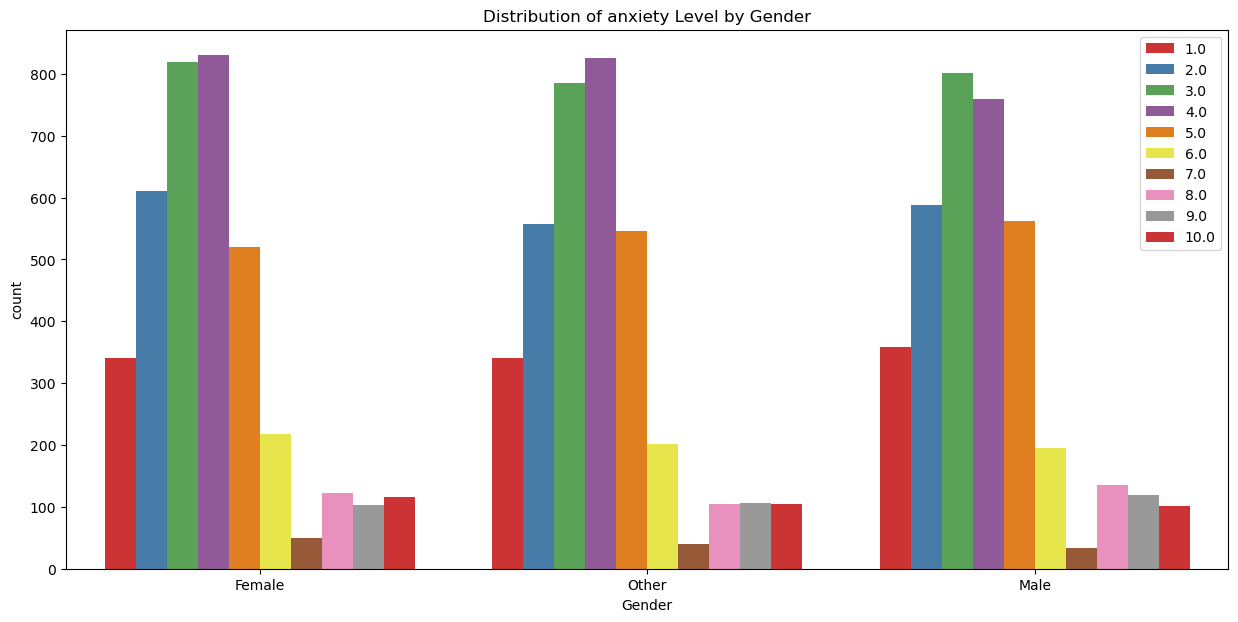

In [8]:
plt.figure(figsize=(15, 7))
sns.countplot(data=data, x='Gender', hue='Anxiety Level (1-10)', palette='Set1')
plt.title("Distribution of anxiety Level by Gender")
plt.legend()
plt.show()

In [9]:
data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [10]:
object=['Gender','Occupation','Smoking','Family History of Anxiety','Dizziness','Medication','Recent Major Life Event']
df=data.drop(object,axis=1)
df.head()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
0,29,6.0,2.7,181,10,10,114,14,4,3,7,5.0
1,46,6.2,5.7,200,8,1,62,23,2,2,8,3.0
2,64,5.0,3.7,117,4,1,91,28,3,1,1,1.0
3,20,5.8,2.8,360,6,4,86,17,3,0,1,2.0
4,49,8.2,2.3,247,4,1,98,19,4,1,3,1.0


In [11]:
corr_matrixs=df.corr()

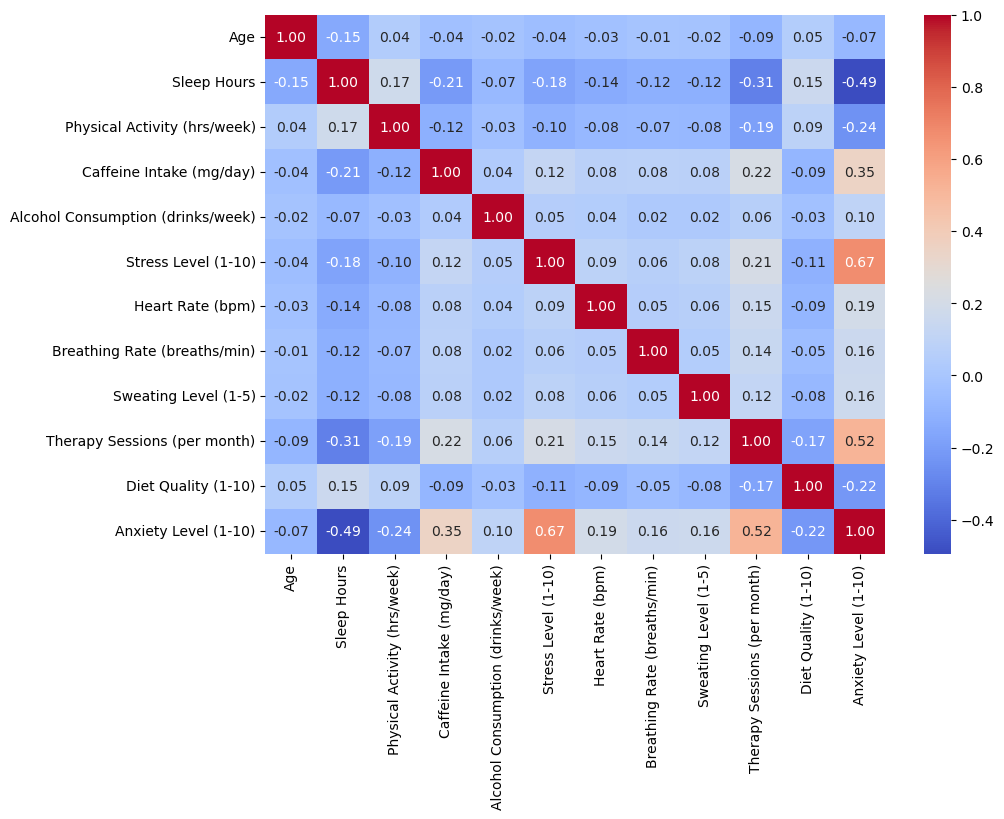

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrixs,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [13]:
object


['Gender',
 'Occupation',
 'Smoking',
 'Family History of Anxiety',
 'Dizziness',
 'Medication',
 'Recent Major Life Event']

In [18]:
Oe=OrdinalEncoder()
closInOe=["Gender",'Occupation','Smoking','Family History of Anxiety','Dizziness','Medication','Recent Major Life Event']
data[closInOe]=Oe.fit_transform(data[closInOe])
data

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,0.0,0.0,6.0,2.7,181,10,1.0,0.0,10,114,14,4,0.0,1.0,3,1.0,7,5.0
1,46,2.0,8.0,6.2,5.7,200,8,1.0,1.0,1,62,23,2,1.0,0.0,2,0.0,8,3.0
2,64,1.0,9.0,5.0,3.7,117,4,0.0,1.0,1,91,28,3,0.0,0.0,1,1.0,1,1.0
3,20,0.0,10.0,5.8,2.8,360,6,1.0,0.0,4,86,17,3,0.0,0.0,0,0.0,1,2.0
4,49,0.0,9.0,8.2,2.3,247,4,1.0,0.0,1,98,19,4,1.0,1.0,1,0.0,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,0.0,4.0,6.1,3.1,566,9,1.0,0.0,8,91,28,1,1.0,1.0,1,0.0,3,6.0
10996,50,2.0,12.0,6.6,3.6,64,17,1.0,0.0,7,95,17,3,0.0,0.0,2,0.0,7,3.0
10997,29,1.0,8.0,6.7,6.9,159,14,0.0,0.0,8,72,16,1,1.0,1.0,2,1.0,7,4.0
10998,53,2.0,0.0,5.7,2.7,248,8,0.0,0.0,4,112,28,3,1.0,1.0,1,1.0,2,4.0


In [15]:
X=data.drop('Anxiety Level (1-10)',axis=1)
y=data['Anxiety Level (1-10)']

In [16]:
y

0        5.0
1        3.0
2        1.0
3        2.0
4        1.0
        ... 
10995    6.0
10996    3.0
10997    4.0
10998    4.0
10999    2.0
Name: Anxiety Level (1-10), Length: 11000, dtype: float64

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [21]:
Lr=LinearRegression()